In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DF = pd.read_csv('PRI_Ideas.csv')

In [9]:
DF.head(50)

,PROCEDURE_CODE,DESCRIPTION,PAYER_NAME,LINE_OF_BUSINESS,ORG_NAME_ORG,CHARGE_PER_UNIT,PAID_AMT_PER_UNIT,ALLOWED_AMT_PER_UNIT
0,27438,"Arthroplasty, patella; with prosthesis",Medicare,Medicare,PIEDMONT HOSPITAL,19031.00,10318.71,19031.00
1,27438,"Arthroplasty, patella; with prosthesis",Aetna,Commercial,PIEDMONT HOSPITAL,17298.00,11629.70,13682.00
2,27438,"Arthroplasty, patella; with prosthesis",Medicare,Medicare,GEORGIA BONE & JOINT LLC,1755.60,188.69,235.30
3,27438,"Arthroplasty, patella; with prosthesis",Aetna,Commercial,ADVANCED CENTER FOR JOINT SURGERY LLC,NaN,NaN,NaN
4,27438,"Arthroplasty, patella; with prosthesis",Medicare,Medicare,ADVANCED CENTER FOR JOINT SURGERY LLC,55000.00,6334.19,7917.74
5,27438,"Arthroplasty, patella; with prosthesis",Cigna,Commercial,SPECIALTY ORTHOPAEDICS PC,2556.75,406.55,747.39
6,27438,"Arthroplasty, patella; with prosthesis",Cigna,Commercial,PIEDMONT ATHENS REGIONAL MEDICAL CENTER,21475.00,11618.41,11618.41
7,27438,"Arthroplasty, patella; with prosthesis",Aetna,Commercial,SOUTHERN SURGICAL ASSISTANTS LLC,1275.00,205.82,257.27
8,27438,"Arthroplasty, patella; with prosthesis",Medicare,Medicare,PIEDMONT SURGERY CENTER,14800.00,6227.78,7784.72
9,27438,"Arthroplasty, patella; with prosthesis",Anthem,Commercial,PIEDMONT ORTHOPEDICS LLC,2939.00,1485.16,1980.21


In [36]:
DF_TKR = DF.loc[DF['PROCEDURE_CODE'] == 27447]

In [100]:
DF_TKR.head()

,PROCEDURE_CODE,DESCRIPTION,PAYER_NAME,LINE_OF_BUSINESS,ORG_NAME_ORG,CHARGE_PER_UNIT,PAID_AMT_PER_UNIT,ALLOWED_AMT_PER_UNIT
23,27447,"Arthroplasty, knee, condyle and plateau; media...",Aetna,Commercial,PEACHTREE ORTHOPAEDIC SURG CTR AT PERIMETER LLC,35000.00,14736.63,15392.01
24,27447,"Arthroplasty, knee, condyle and plateau; media...",Anthem,Commercial,PEACHTREE ORTHOPAEDIC SURG CTR AT PERIMETER LLC,35000.00,14331.24,15965.00
25,27447,"Arthroplasty, knee, condyle and plateau; media...",Cigna,Commercial,PEACHTREE ORTHOPAEDIC SURG CTR AT PERIMETER LLC,35000.00,15362.09,16440.09
26,27447,"Arthroplasty, knee, condyle and plateau; media...",Anthem,Medicaid,PEACHTREE ORTHOPAEDIC SURG CTR AT PERIMETER LLC,35000.00,8427.73,8745.07
28,27447,"Arthroplasty, knee, condyle and plateau; media...",Humana,Medicare,PEACHTREE ORTHOPAEDIC SURG CTR AT PERIMETER LLC,23966.67,9474.92,9750.00


In [14]:
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

In [37]:
#data cleaning

DF_TKR = DF_TKR.dropna()

In [38]:
#mean/std 

mean = DF_TKR['CHARGE_PER_UNIT'].mean()
std = DF_TKR['CHARGE_PER_UNIT'].std()

In [39]:
dist_data = normal_dist(DF_TKR['CHARGE_PER_UNIT'],mean,std)

Text(0.5, 1.0, 'Normalized Procedure Negotiated Amount of Total Knee Athroscopy in Atlanta, GA by Payer Name')

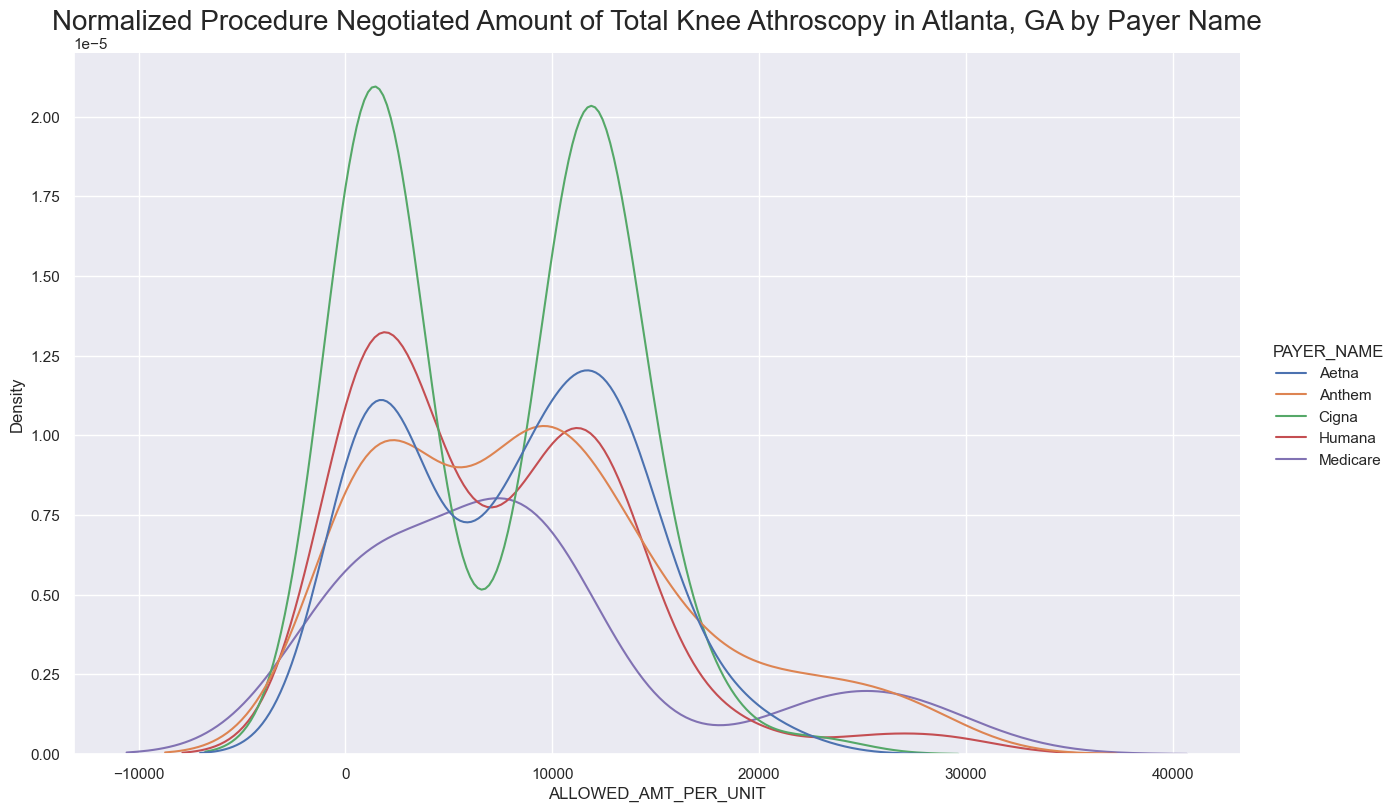

In [104]:

sns.displot( data=DF_TKR, x='ALLOWED_AMT_PER_UNIT', hue='PAYER_NAME', kind="kde", aspect = 1.6, height = 8)
plt.title('Normalized Procedure Negotiated Amount of Total Knee Athroscopy in Atlanta, GA by Payer Name', fontsize = 20)

Text(0.5, 1.0, 'Normalized Procedure Charge of Total Knee Athroscopy in Atlanta, GA by Payer Name')

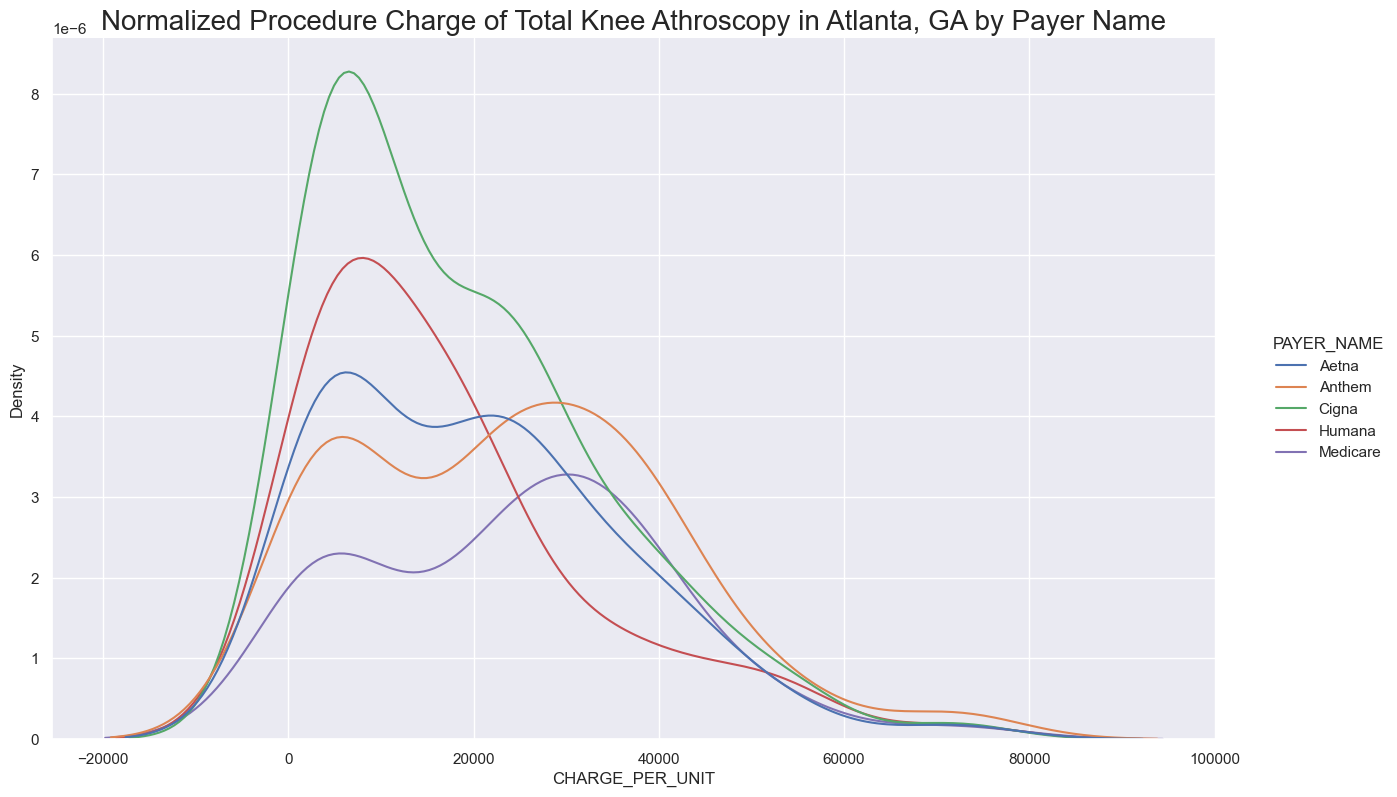

In [103]:
sns.displot( data=DF_TKR, x='CHARGE_PER_UNIT', hue='PAYER_NAME', kind="kde", aspect = 1.6, height = 8)
plt.title('Normalized Procedure Charge of Total Knee Athroscopy in Atlanta, GA by Payer Name', fontsize = 20)